In [12]:
%load_ext autoreload
%autoreload 2

from ff_environment import TargetReach, ReachToPoint
from agents.agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import gym

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
env = ReachToPoint(space_padding=2, discover=False)
env_info=env.reset()

In [15]:
#size of each action
action_size = env.action_size
print('Size of each action:', action_size)


#examien the state space 
state = env_info.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:',state)

Size of each action: 2
The agent observes a state with length: 6
The starting state looks like: [0.5 1.  0.  0.  0.  0. ]


In [16]:
agent = Agent(state_size,action_size)


In [17]:
print(agent.target_actor.mu.bias)

Parameter containing:
tensor([-0.0024,  0.0026], requires_grad=True)


In [18]:
scores,trajectories,actions_tracker = agent.train_ddpg(env,n_episodes=10000,print_every=1000,stop=False)

Episode 0 	Average Reward: -1.13
Episode 1000 	Average Reward: -1.05
Episode 2000 	Average Reward: -0.95
Episode 3000 	Average Reward: -1.10
Episode 4000 	Average Reward: -1.12
Episode 5000 	Average Reward: -1.04
Episode 6000 	Average Reward: -1.10
Episode 7000 	Average Reward: -1.10
Episode 8000 	Average Reward: -1.77
Episode 9000 	Average Reward: -1.82
Episode 9999 	Average Reward: -1.33

In [19]:
print(agent.target_actor.mu.bias)

Parameter containing:
tensor([-0.0076,  0.0371], requires_grad=True)


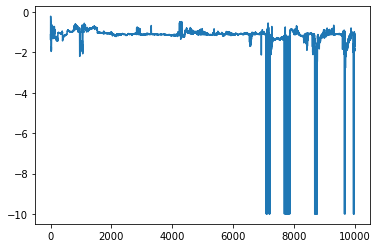

In [20]:
plt.plot(scores)

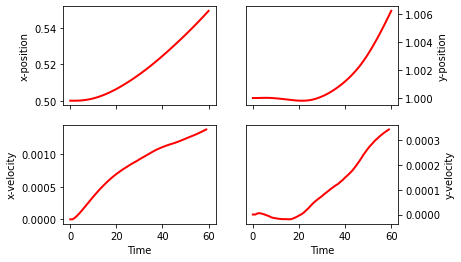

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:ylabel='x-position'>,
         <AxesSubplot:ylabel='y-position'>],
        [<AxesSubplot:xlabel='Time', ylabel='x-velocity'>,
         <AxesSubplot:xlabel='Time', ylabel='y-velocity'>]], dtype=object))

In [323]:
trajectories.plot_kinematics(499)